In [1]:
import json
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from validation.gp.create_train_inference import create_train_inference_gp
from lib.util import helper, data_preprocessing
import torch
import gpytorch

### Preprocess Data

In [2]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess(
    machine='eg_30T', 
    freq=30,
    normalize_time=True
    )

### 30 minutes agg.

In [3]:
## Locally Periodic Kernel ##
period_constraint_short = gpytorch.constraints.Interval(0.07, 0.11) ## short term

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_short
        )
    )

seasonal_rbf_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_short_periodic = seasonal_periodic_short * seasonal_rbf_short

period_constraint_long = gpytorch.constraints.Interval(0.18, 0.21) ## long term

seasonal_periodic_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_long
        )
    )

seasonal_rbf_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_long_periodic = seasonal_periodic_long * seasonal_rbf_long

## Local Variations ##
local_variation_alpha = gpytorch.priors.GammaPrior(1, 0.5)

local_variation = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
    )
    
local_variation.alpha = local_variation_alpha


covar_module = locally_short_periodic + locally_long_periodic + local_variation

### Create, Train, and Perform Inference

Iter 1 , Loss = 0.9561894698184518 , Noise = 0.6932471990585327
Iter 2 , Loss = 0.9168885438313218 , Noise = 0.6444966793060303
Iter 3 , Loss = 0.8780132549056773 , Noise = 0.5982138514518738
Iter 4 , Loss = 0.8391955971957893 , Noise = 0.5543694496154785
Iter 5 , Loss = 0.8001612723312093 , Noise = 0.5129261612892151
Iter 6 , Loss = 0.761103794103693 , Noise = 0.4738385081291199
Iter 7 , Loss = 0.7222046539232841 , Noise = 0.4370555877685547
Iter 8 , Loss = 0.6835267905868729 , Noise = 0.4025220274925232
Iter 9 , Loss = 0.6451847352895834 , Noise = 0.3701780438423157
Iter 10 , Loss = 0.6074639031089349 , Noise = 0.3399597108364105
Iter 11 , Loss = 0.5711487590299765 , Noise = 0.3117991089820862
Iter 12 , Loss = 0.536844335197074 , Noise = 0.28562551736831665
Iter 13 , Loss = 0.5041163568872284 , Noise = 0.26136648654937744
Iter 14 , Loss = 0.4717024814193573 , Noise = 0.23894467949867249
Iter 15 , Loss = 0.4388137033146015 , Noise = 0.21827316284179688
Iter 16 , Loss = 0.4054581801233

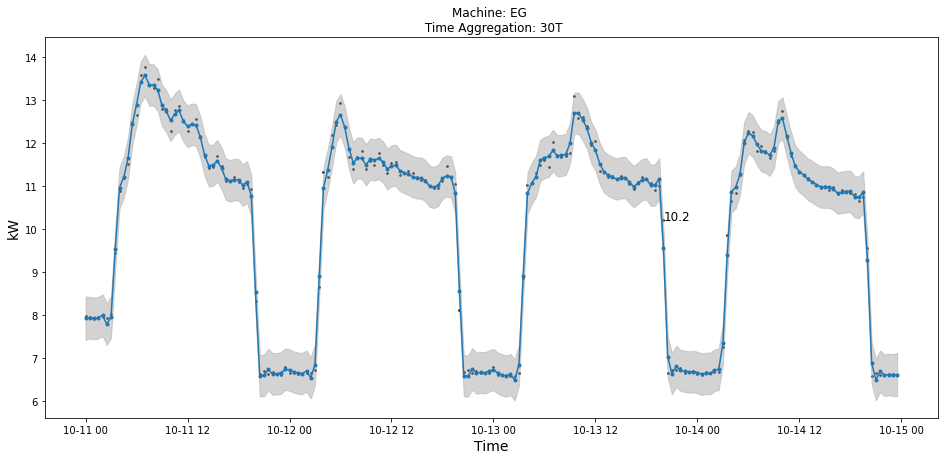

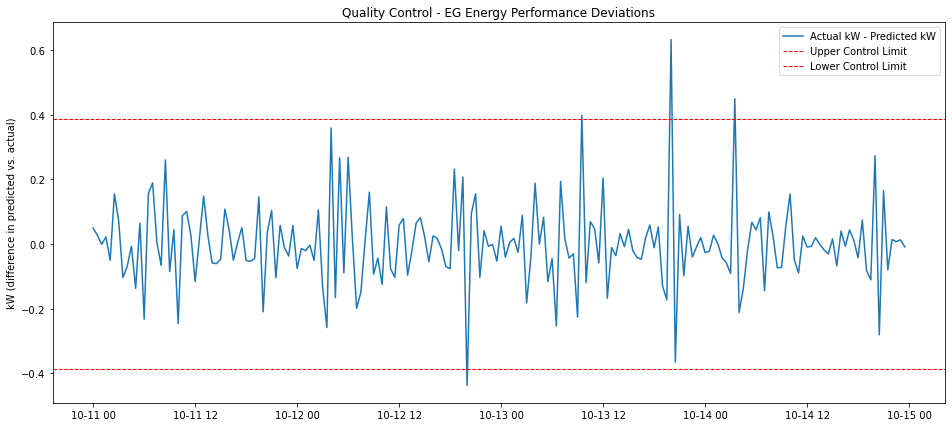

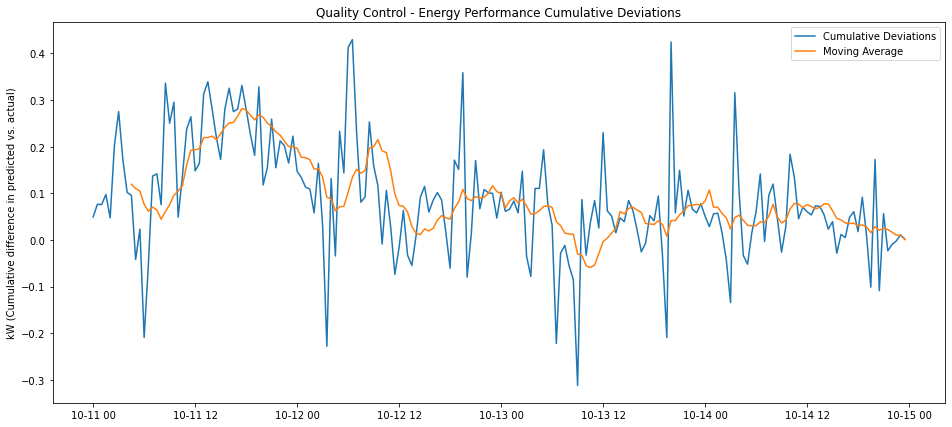

EG
-----------------------------------
Expected next day energy consumption    =  240.0720228279047 kWh
Upper bound next day energy consumption =  268.4192435698057 kWh
Lower bound next day energy consumption =  211.72480208600368 kWh


Abnormal High Energy Consumption
---------------------------------
2021-10-13 20:00:00 10.204072062890976


Abnormal Low Energy Consumption
---------------------------------


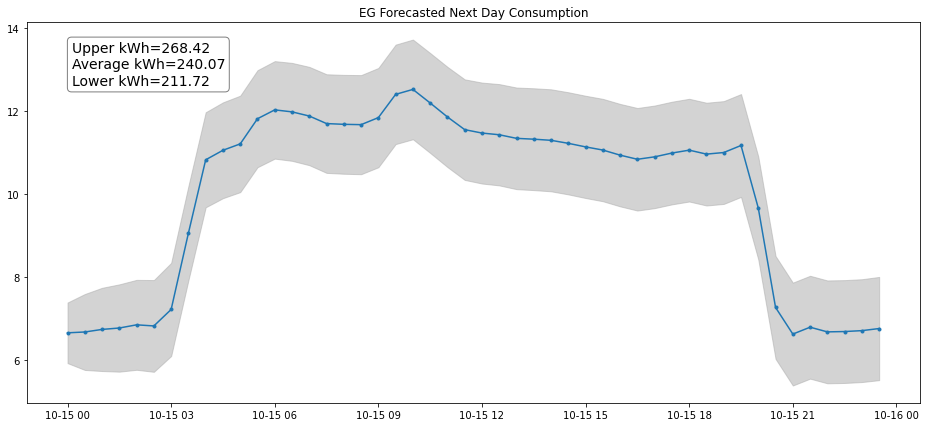

In [4]:
func_preds_mean_inv, func_preds_var_inv, observed_preds, mse, mape = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    time_agg='30T',
    lr=0.1, 
    machine='EG',
    update_score=False
)

In [5]:
mse, mape

(2.629507016783393, 0.11482377180372104)

### 10 minutes agg..

In [5]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess(
    machine='eg_10T', 
    freq=10,
    normalize_time=True
    )

In [6]:
## Locally Periodic Kernel ##
period_constraint_short = gpytorch.constraints.Interval(0.06, 0.09) ## short term

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_short
        )
    )

seasonal_rbf_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_short_periodic = seasonal_periodic_short * seasonal_rbf_short

period_constraint_long = gpytorch.constraints.Interval(0.18, 0.21) ## long term

seasonal_periodic_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_long
        )
    )

seasonal_rbf_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_long_periodic = seasonal_periodic_long * seasonal_rbf_long

## Local Variations ##
local_variation_alpha = gpytorch.priors.GammaPrior(1, 0.5)

local_variation = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
    )
    
local_variation.alpha = local_variation_alpha


covar_module = locally_short_periodic + locally_long_periodic + local_variation

Iter 1 , Loss = 0.8787313519644584 , Noise = 0.6932471990585327
Iter 2 , Loss = 0.8410719177130657 , Noise = 0.6444966793060303
Iter 3 , Loss = 0.8041426759673571 , Noise = 0.5982121825218201
Iter 4 , Loss = 0.7671143164174216 , Noise = 0.5543684363365173
Iter 5 , Loss = 0.7291590939906981 , Noise = 0.5129337310791016
Iter 6 , Loss = 0.6905479393004391 , Noise = 0.4738669693470001
Iter 7 , Loss = 0.6521310210032641 , Noise = 0.43711787462234497
Iter 8 , Loss = 0.6144741162637102 , Noise = 0.40263018012046814
Iter 9 , Loss = 0.5778462147635979 , Noise = 0.3703429698944092
Iter 10 , Loss = 0.5423642557523297 , Noise = 0.3401902914047241
Iter 11 , Loss = 0.5074999533995458 , Noise = 0.31210169196128845
Iter 12 , Loss = 0.4725677222414278 , Noise = 0.28600138425827026
Iter 13 , Loss = 0.43730935249804165 , Noise = 0.26180747151374817
Iter 14 , Loss = 0.40182364790183367 , Noise = 0.23943236470222473
Iter 15 , Loss = 0.3664070469208909 , Noise = 0.21878446638584137
Iter 16 , Loss = 0.331468

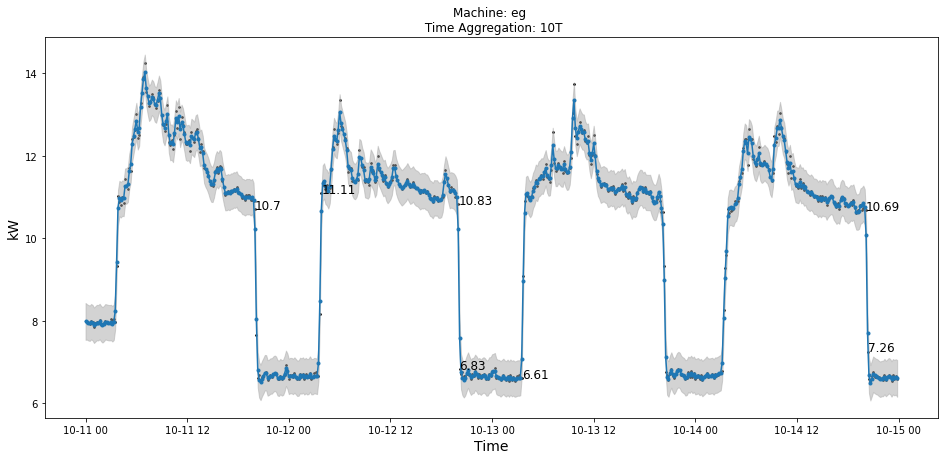

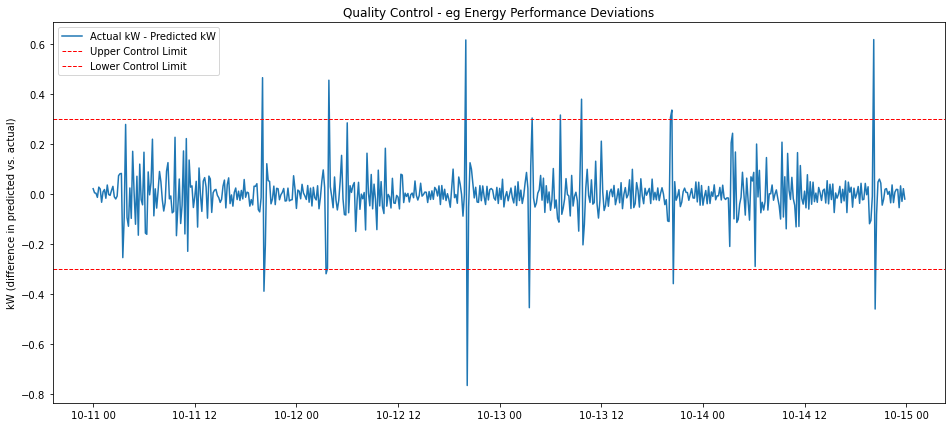

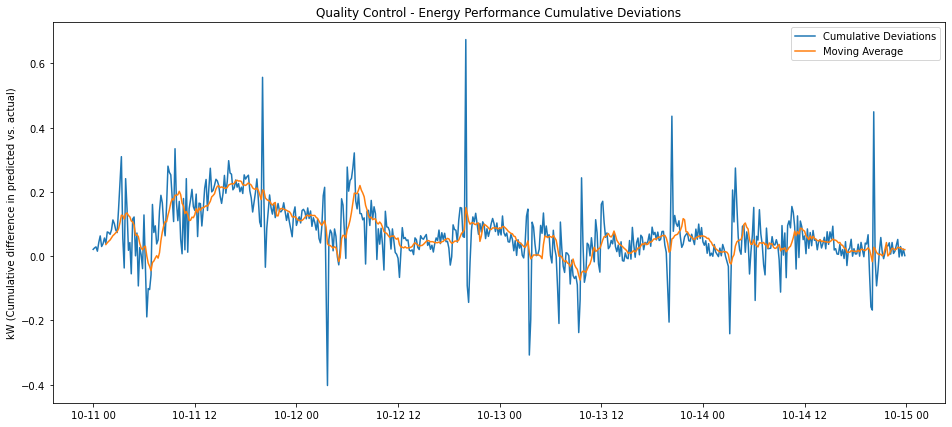

eg
-----------------------------------
Expected next day energy consumption    =  721.0061354750296 kWh
Upper bound next day energy consumption =  813.966255172538 kWh
Lower bound next day energy consumption =  628.0460157775212 kWh


Abnormal High Energy Consumption
---------------------------------
2021-10-11 20:00:00 10.699650311048607
2021-10-12 03:50:00 11.106098900224232
2021-10-12 20:00:00 10.831000444522491
2021-10-14 20:10:00 10.687876900772972


Abnormal Low Energy Consumption
---------------------------------
2021-10-12 20:10:00 6.825324085030738
2021-10-13 03:30:00 6.613589815210254
2021-10-14 20:20:00 7.255356782370299


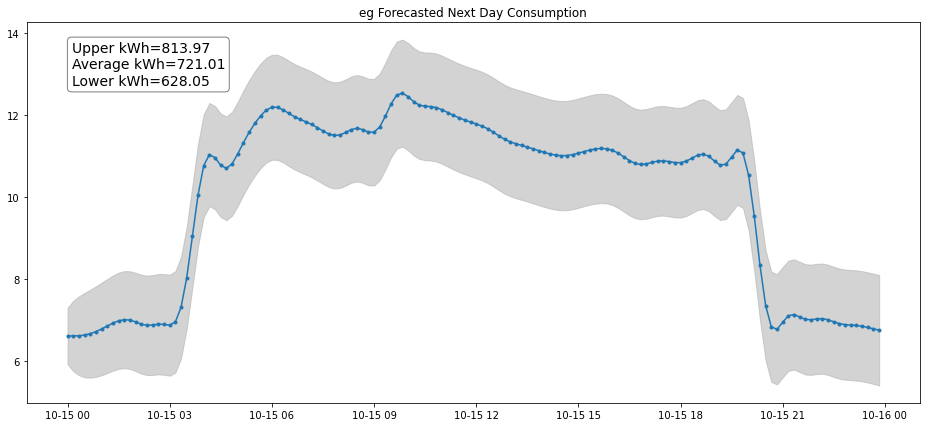

In [7]:
model, likelihood, mse, mape, perf_dev_upper = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    time_agg='10T',
    lr=0.1, 
    machine='eg',
    update_score=False
)

In [6]:
mse, mape

(2.581546513507499, 0.11672317620313545)